In [5]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the file using Google Colab's built-in file upload
uploaded_files = files.upload()  # Opens a file upload dialog in the Colab interface.

# Read the uploaded file into a DataFrame
# Upload train.csv dataset file
file_name = list(uploaded_files.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name, encoding='ISO-8859-1')  # Read the CSV file into a DataFrame.


Saving train.csv to train.csv


In [6]:
df.info()  # Print concise summary of DataFrame including index dtype and column dtypes, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [7]:
df.head()                                              #head command gives the first 5 lines of our dataset

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [8]:
df.tail()                                             #tail command gives the last 5 lines of our dataset

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [9]:
df.shape                                           #rows and columns of dataset

(99989, 3)

In [10]:
df.columns.tolist                                 #column names

<bound method IndexOpsMixin.tolist of Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')>

In [11]:
df.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

In [12]:
#Count the number of occurrences of each sentiment label (1 and 0) in the 'Sentiment' column of the DataFrame and store them in a list.
count=[]
count.append(int(df.Sentiment.value_counts()[1]))
count.append(int(df.Sentiment.value_counts()[0]))

In [13]:
print(count)

[56457, 43532]


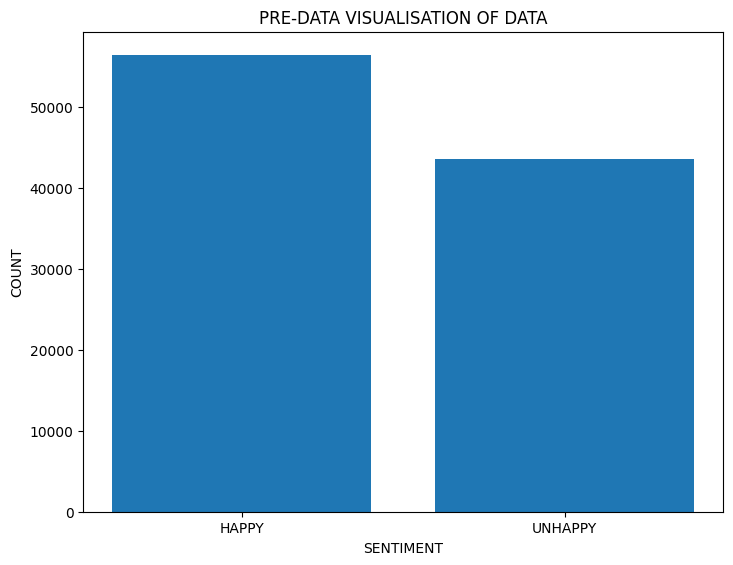

In [14]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig1=plt.figure()
axes=fig1.add_axes([0,0,1,1])
label=['HAPPY','UNHAPPY']
axes.bar(label,count)
plt.xlabel("SENTIMENT")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [15]:
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [16]:
#Preprocess the 'SentimentText' column by removing non-alphanumeric characters and converting all text to lowercase.
preprocess1=[]
for each_row in range(df.shape[0]):
    text=df['SentimentText'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1.append(regex)
df["Preprocessed_1"]=preprocess1

In [17]:
df[['Preprocessed_1']]

,Preprocessed_1
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7 30 O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me!!! ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE 2120 ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [18]:
# Further preprocess the 'Preprocessed_1' column by removing non-alphabetic characters and retaining only alphabetic characters.
preprocess2=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2.append(regex_p1)
df["Preprocessed_2"]=preprocess2

In [19]:
df[['Preprocessed_2']]

,Preprocessed_2
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [20]:
# Convert the text in the 'Preprocessed_2' column to lowercase.
preprocess3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3.append(regex_p2)
df["Preprocessed_3"]=preprocess3

In [21]:
df[['Preprocessed_3']]

,Preprocessed_3
0,is so sad for my apl frie...
1,i missed the new moon trail...
2,omg its already o
3,omgaga im sooo im gunna cry i ...
4,i think mi bf is cheating on me ...
...,...
99984,cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,cupcake ya i thought so
99987,cupcake dollie yes yes i m glad you had mor...


In [22]:
# Download the stopwords corpus from NLTK.
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
# Import stopwords list from NLTK's English corpus.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')

In [24]:
# Download the punkt tokenizer models from NLTK.
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
# Tokenize the text in the 'SentimentText' column and remove stopwords, then concatenate the remaining words into a single string.
preprocess4=[]
for each_row in range(df.shape[0]):
    text=df['SentimentText'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4.append(dre)
df['Preprocessed_4']=preprocess4

In [26]:
df[['Preprocessed_4']]

,Preprocessed_4
0,sad APL friend .............
1,I missed New Moon trailer ...
2,omg already 7:30 : O
3,.. Omgaga . Im sooo im gunna CRy . I 've denti...
4,think mi bf cheating ! ! ! T_T
...,...
99984,@ Cupcake seems like repeating problem hope 'r...
99985,@ cupcake__ arrrr replied different tweets tim...
99986,@ CuPcAkE_2120 ya thought
99987,@ Cupcake_Dollie Yes . Yes . I 'm glad fun .


In [27]:
# Import the WordNetLemmatizer from NLTK's stem module.
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [28]:
# Download the WordNet corpus and the Open Multilingual WordNet (OMW) 1.4 dataset from NLTK.
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [29]:
# Lemmatize the words in the 'Preprocessed_4' column using the WordNetLemmatizer.
preprocess_5=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess_5.append(dre)
df['Preprocessed_5']=preprocess_5

In [30]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad APL friend .............
1,I missed New Moon trailer ...
2,omg already 7:30 : O
3,.. Omgaga . Im sooo im gunna CRy . I 've denti...
4,think mi bf cheating ! ! ! T_T
...,...
99984,@ Cupcake seems like repeating problem hope 'r...
99985,@ cupcake__ arrrr replied different tweet time...
99986,@ CuPcAkE_2120 ya thought
99987,@ Cupcake_Dollie Yes . Yes . I 'm glad fun .


In [31]:
#removing empty rows
df=df[df['Preprocessed_5']!='']

In [32]:
df.shape

(99985, 8)

In [33]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad APL friend .............
1,I missed New Moon trailer ...
2,omg already 7:30 : O
3,.. Omgaga . Im sooo im gunna CRy . I 've denti...
4,think mi bf cheating ! ! ! T_T
...,...
99984,@ Cupcake seems like repeating problem hope 'r...
99985,@ cupcake__ arrrr replied different tweet time...
99986,@ CuPcAkE_2120 ya thought
99987,@ Cupcake_Dollie Yes . Yes . I 'm glad fun .


In [34]:
per=list()
df2 = pd.DataFrame()
df2['Clean Tweets']=df['SentimentText']
df2['Sentiment']=df['Sentiment']

In [35]:
df2

,Clean Tweets,Sentiment
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,i think mi bf is cheating on me!!! ...,0
...,...,...
99984,@Cupcake seems like a repeating problem hop...,0
99985,@cupcake__ arrrr we both replied to each other...,1
99986,@CuPcAkE_2120 ya i thought so,0
99987,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,1


In [36]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [37]:
#FEATURE EXTRACTION - Mapping from textual data into real valued vectors for making compatible with model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()        #Loading tfidf function to our variable

In [38]:
#Fitting and transforming the vectorizer to our data
x=df2['Clean Tweets']
vectorizer.fit(x)

x=vectorizer.transform(x)   #Transforming all the text data and gives corresponding tf-idf value

In [39]:
print(x)

  (0, 93674)	0.22523244176959206
  (0, 90542)	0.33719361940549114
  (0, 80817)	0.20078834049859604
  (0, 71938)	0.20751257559588177
  (0, 65503)	0.3930087153818444
  (0, 65062)	0.20497498406511383
  (0, 21665)	0.7454681676889592
  (1, 99049)	0.5937007613243295
  (1, 97552)	0.16918072294342693
  (1, 81633)	0.3550604260690351
  (1, 80032)	0.562039068758136
  (1, 79478)	0.4206441108780835
  (2, 83232)	0.5069438375250558
  (2, 72089)	0.4013163925253586
  (2, 14693)	0.4877150683224832
  (2, 1718)	0.5865893885990415
  (3, 102394)	0.11225428501612061
  (3, 101379)	0.14902415832321234
  (3, 97908)	0.12296298350068229
  (3, 96026)	0.35668908211678
  (3, 93951)	0.20899652813505268
  (3, 92847)	0.1861101582493583
  (3, 87411)	0.18785375735178111
  (3, 83282)	0.10256590807138256
  (3, 83233)	0.35668908211678
  :	:
  (99981, 61592)	0.21806006453264565
  (99981, 61442)	0.315503091927943
  (99981, 59990)	0.21871993110714344
  (99981, 58287)	0.35290777198359047
  (99981, 37857)	0.1887135913125785
  (9

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Split the data into training and testing sets using the specified features (x) and the 'Sentiment' column as the target variable, with a test size of 20% and a train size of 80%.
x_train,x_test,y_train,y_test=train_test_split(x,df2['Sentiment'],test_size=0.20,train_size=0.80)

In [42]:
x_train.shape

(79988, 105849)

In [43]:
x_test.shape

(19997, 105849)

In [44]:
y_train.shape

(79988,)

In [45]:
y_test.shape

(19997,)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [47]:
import functools
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm

LOGISTIC REGRESSION

In [48]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()

In [49]:
lrc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred2=lrc.predict(x_test)

In [51]:
# Calculate the accuracy, precision, recall, and F1 score using the predicted values (y_pred2) and the actual values (y_test) for evaluating the performance of a logistic regression classifier.
lrc1=accuracy_score(y_pred2,y_test)
lrc2=precision_score(y_pred2,y_test)
lrc3=recall_score(y_pred2,y_test)
lrc4=f1_score(y_pred2,y_test)

In [52]:
print(lrc1,lrc2,lrc3,lrc4)

0.7686152922938441 0.8368662780427486 0.7731538147694819 0.803749416804513


GRADIENT BOOSTING MACHINE

In [53]:
# Train an XGBoost classifier and evaluate its performance on the test data.
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(x_train, y_train)

y_pred_xg = classifier_xg.predict(x_test)
xgb1=accuracy_score(y_pred_xg,y_test)
xgb2=precision_score(y_pred_xg,y_test)
xgb3=recall_score(y_pred_xg,y_test)
xgb4=f1_score(y_pred_xg,y_test)

In [54]:
xgb1,xgb2,xgb3,xgb4

(0.7398109716457468,
 0.8517929694400282,
 0.7323259169261144,
 0.7875546118982484)

NAIVE BAYES

In [55]:
#NAIVEBayes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [56]:
nb.fit(x_train,y_train)

MultinomialNB()

In [57]:
y_pred3=nb.predict(x_test)

In [58]:
# Evaluate the performance of a Naive Bayes classifier on the test data.
nb1=accuracy_score(y_pred3,y_test)
nb2=precision_score(y_pred3,y_test)
nb3=recall_score(y_pred3,y_test)
nb4=f1_score(y_pred3,y_test)

In [59]:
print(nb1,nb2,nb3,nb4)

0.7424113617042556 0.8831478537360891 0.7231503579952268 0.7951807228915663


STOCHASTIC GRADIENT DESCENT

In [60]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='hinge')

In [61]:
sgd.fit(x_train,y_train)

SGDClassifier()

In [62]:
y_pred4=sgd.predict(x_test)

In [63]:
sgd1=accuracy_score(y_pred4,y_test)
sgd2=precision_score(y_pred4,y_test)
sgd3=recall_score(y_pred4,y_test)
sgd4=f1_score(y_pred4,y_test)

In [64]:
print(sgd1,sgd2,sgd3,sgd4)

0.7584637695654348 0.8593004769475358 0.7503470615455807 0.8011363636363635


DECISION TREE CLASSIFIER

In [65]:
# Import the DecisionTreeClassifier from the sklearn.tree module.
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [66]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred5=dt.predict(x_test)

In [68]:
# Evaluate the performance of a Decision Tree classifier on the test data.
dt1=accuracy_score(y_pred5,y_test)
dt2=precision_score(y_pred5,y_test)
dt3=recall_score(y_pred5,y_test)
dt4=f1_score(y_pred5,y_test)

In [69]:
print(dt1,dt2,dt3,dt4)

0.6842526378956844 0.7287581699346405 0.7178527927614408 0.7232643758765779


RANDOM FOREST CLASSIFIER

In [70]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc= RandomForestClassifier()

In [72]:
# Fit the Random Forest classifier to the training data (x_train, y_train).
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
y_pred6=rfc.predict(x_test)

In [74]:
# Evaluate the performance of a RandomForest Classifier on the test data.
rfc1=accuracy_score(y_pred6,y_test)
rfc2=precision_score(y_pred6,y_test)
rfc3=recall_score(y_pred6,y_test)
rfc4=f1_score(y_pred6,y_test)

In [75]:
rfc1,rfc2,rfc3,rfc4

(0.7570635595339301,
 0.8447270800211977,
 0.7552116234996842,
 0.7974651880263487)

Support Vector Machine

In [76]:
from sklearn.svm import SVC

In [77]:
#Support Vector Machine
svm=SVC()

In [78]:
svm.fit(x_train,y_train)

SVC()

In [80]:
y_pred7=svm.predict(x_test)

In [81]:
# Evaluate the performance of a Support Vector Machine classifier on the test data.
svm1=accuracy_score(y_pred7,y_test)
svm2=precision_score(y_pred7,y_test)
svm3=recall_score(y_pred7,y_test)
svm4=f1_score(y_pred7,y_test)

In [82]:
svm1,svm2,svm3,svm4

(0.7770165524828724,
 0.8442237787037858,
 0.7789594240837696,
 0.8102795387822831)

In [82]:
import joblib
filename='svm_joblib2'
joblib.dump(svm,filename)

['svm_joblib2']

ENSEMBLED VOTING CLASSIFIER 1------> SVM,LR

In [84]:
from sklearn.ensemble import VotingClassifier

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
# Initialize four classifiers: Logistic Regression, SGD Classifier, SVC, and Decision Tree.
one=LogisticRegression(max_iter=250)
two=SGDClassifier()
three=SVC()
four=DecisionTreeClassifier()

In [87]:
# Initialize a Voting Classifier with Logistic Regression and Support Vector Machine as estimators, using hard voting.
ens=VotingClassifier(estimators=[('Logistic',one),('SVM',three)],voting='hard')

In [88]:
# Fit the Voting Classifier to the training data (x_train, y_train).
ens.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression(max_iter=250)),
                             ('SVM', SVC())])

In [89]:
ens_y_pred=ens.predict(x_test)

In [90]:
print(accuracy_score(ens_y_pred,y_test))

0.772465869880482


In [101]:
# Evaluate the performance of the ensemble classifier on the test data.
ens1=accuracy_score(ens_y_pred,y_test)
ens2=precision_score(ens_y_pred,y_test)
ens3=recall_score(ens_y_pred,y_test)
ens4=f1_score(ens_y_pred,y_test)

In [102]:
ens1,ens2,ens3,ens4

(0.772465869880482, 0.8254725313548843, 0.7840604026845638, 0.8042337148266069)

pip install pyvi

Text(0.5, 1.0, 'Representation of measures')

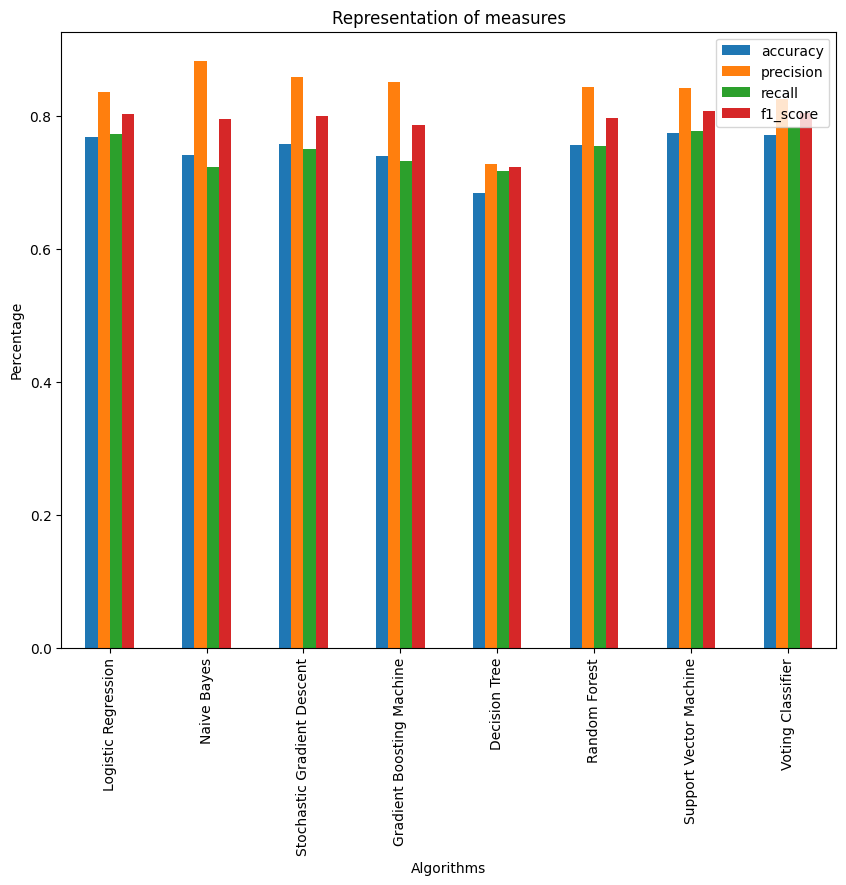

In [103]:
# Visualize performance measures of different algorithms using a bar plot.
graph=pd.DataFrame({"accuracy":[lrc1,nb1,sgd1,xgb1,dt1,rfc1,svm1,ens1],
                    "precision":[lrc2,nb2,sgd2,xgb2,dt2,rfc2,svm2,ens2],
                     "recall":[lrc3,nb3,sgd3,xgb3,dt3,rfc3,svm3,ens3],
                     "f1_score":[lrc4,nb4,sgd4,xgb4,dt4,rfc4,svm4,ens4]},
                  index=["Logistic Regression","Naive Bayes","Stochastic Gradient Descent","Gradient Boosting Machine","Decision Tree","Random Forest","Support Vector Machine","Voting Classifier"])
graph.plot(kind='bar',figsize=(10,8))
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Representation of measures")

In [104]:
# Display performance measures of different algorithms in a tabular format using PrettyTable.
from prettytable import PrettyTable

Table = PrettyTable(["Algorithms", "Accuracy", "Precision", "Recall","F1_Score"])


Table.add_row(["NB", round(nb1*100,1),round(nb2*100,1),round(nb3*100,1),round(nb4*100,1)])
Table.add_row(["LR", round(lrc1*100,1),round(lrc2*100,1),round(lrc3*100,1),round(lrc4*100,1)])
Table.add_row(["SGD", round(sgd1*100,1),round(sgd2*100,1),round(sgd3*100,1),round(sgd4*100,1)])
Table.add_row(["GB", round(xgb1*100,1),round(xgb2*100,1),round(xgb3*100,1),round(xgb4*100,1)])
Table.add_row(["DT", round(dt1*100,1),round(dt2*100,1),round(dt3*100,1),round(dt4*100,1)])
Table.add_row(["RF", round(rfc1*100,1),round(rfc2*100,1),round(rfc3*100,1),round(rfc4*100,1)])
Table.add_row(["SVM", round(svm1*100,1),round(svm2*100,1),round(svm3*100,1),round(svm4*100,1)])
Table.add_row(["VC", round(ens1*100,1),round(ens2*100,1),round(ens3*100,1),round(ens4*100,1)])
print(Table)

+------------+----------+-----------+--------+----------+
| Algorithms | Accuracy | Precision | Recall | F1_Score |
+------------+----------+-----------+--------+----------+
|     NB     |   74.2   |    88.3   |  72.3  |   79.5   |
|     LR     |   76.9   |    83.7   |  77.3  |   80.4   |
|    SGD     |   75.8   |    85.9   |  75.0  |   80.1   |
|     GB     |   74.0   |    85.2   |  73.2  |   78.8   |
|     DT     |   68.4   |    72.9   |  71.8  |   72.3   |
|     RF     |   75.7   |    84.5   |  75.5  |   79.7   |
|    SVM     |   77.4   |    84.2   |  77.7  |   80.9   |
|     VC     |   77.2   |    82.5   |  78.4  |   80.4   |
+------------+----------+-----------+--------+----------+
